Diabetes Prediction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("./diabetes.csv")

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


EDA

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Checking 0 in the features
print(df[df["BMI"]== 0].shape[0])
print(df[df["Glucose"]== 0].shape[0])
print(df[df["BloodPressure"]== 0].shape[0])
print(df[df["SkinThickness"]== 0].shape[0])
print(df[df["Insulin"]== 0].shape[0])

11
5
35
227
374


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

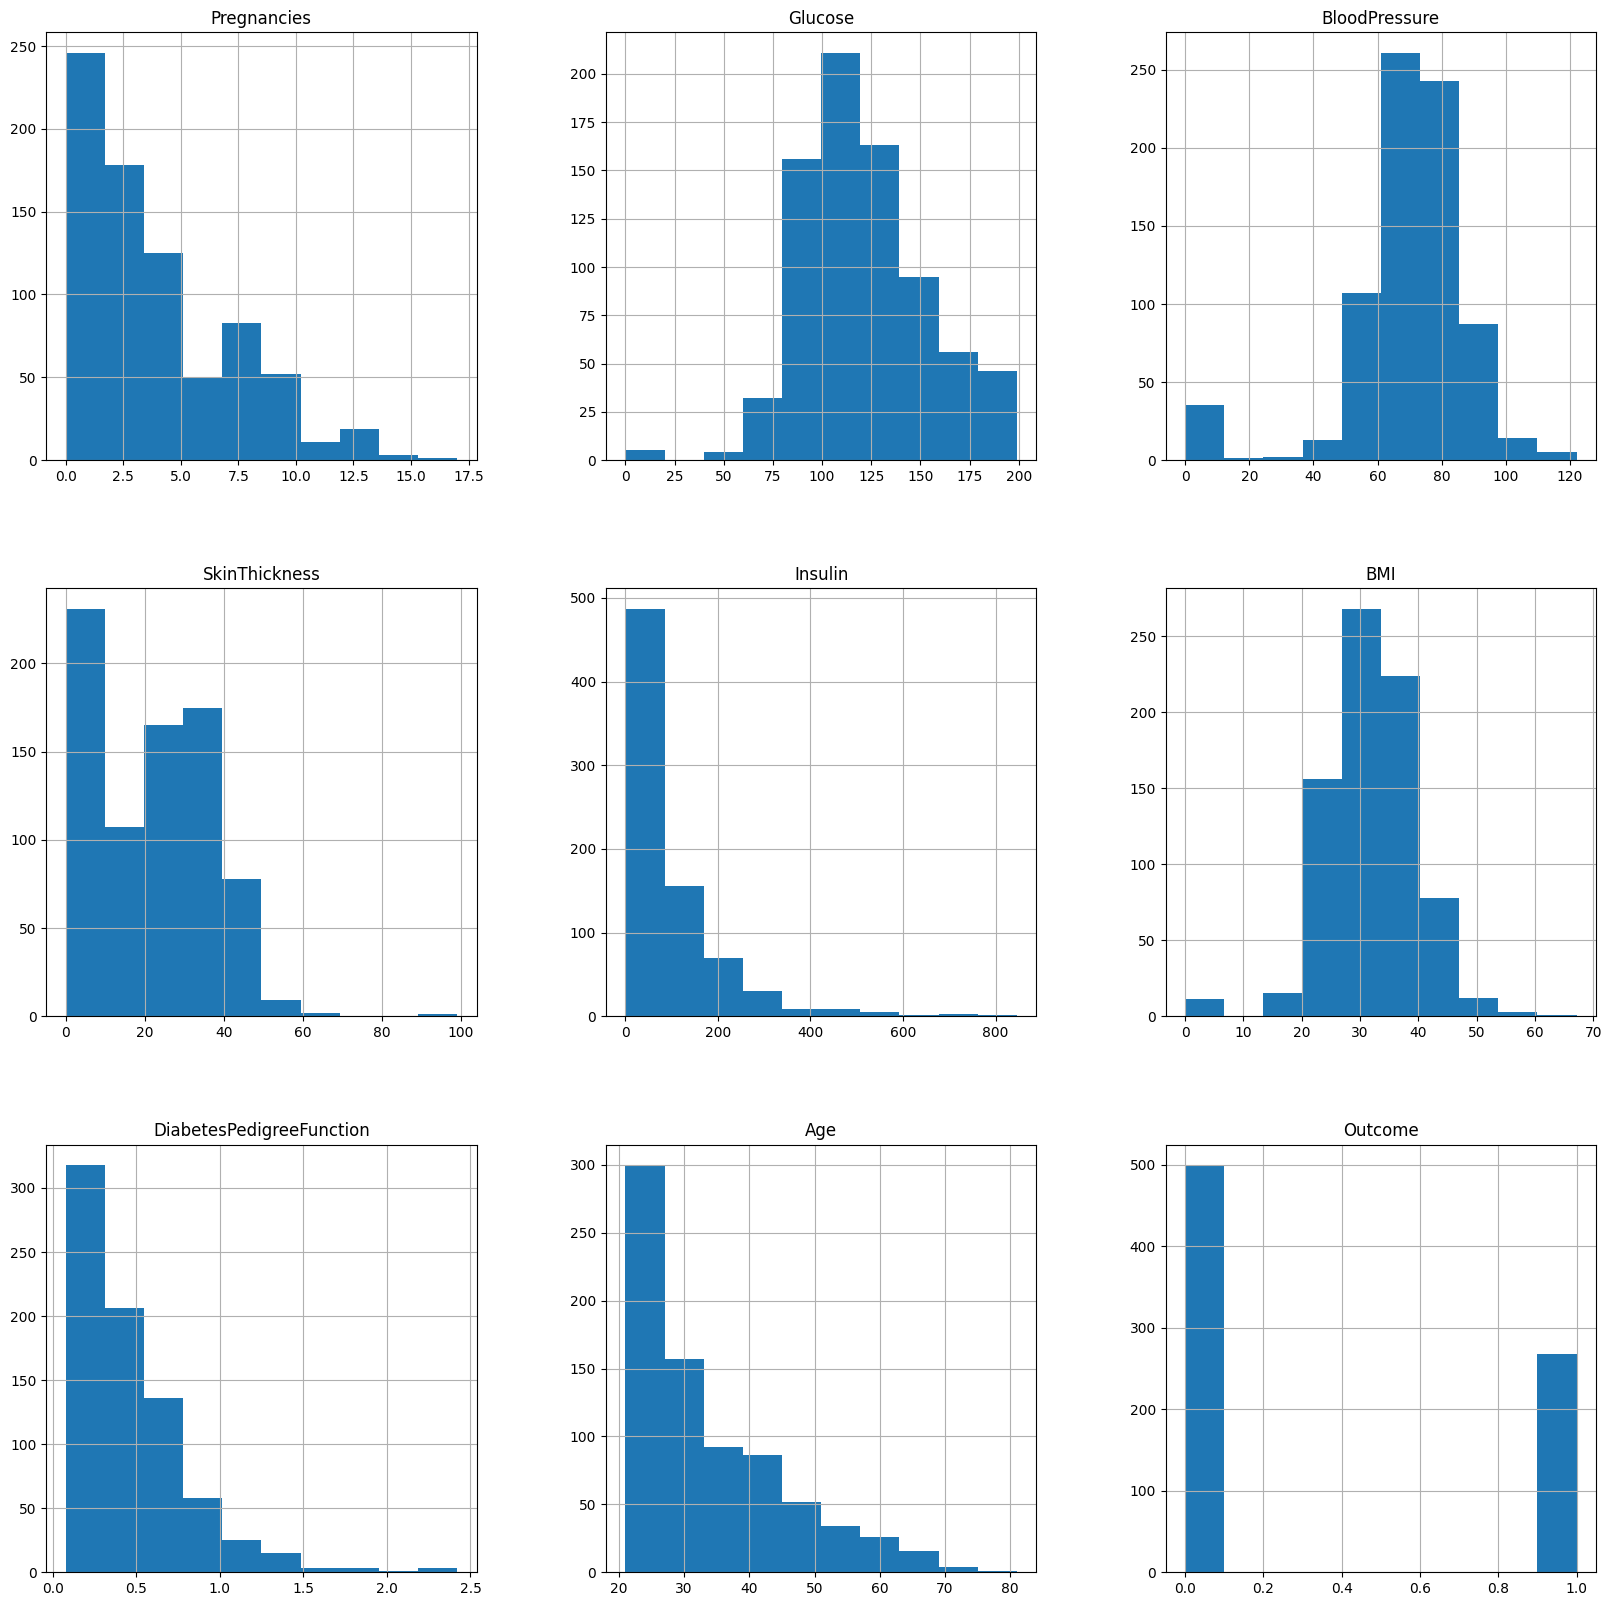

In [9]:
df.hist(figsize=(20, 20))

In [10]:
df["Glucose"] = df["Glucose"].replace(0 , df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0 , df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0 , df["SkinThickness"].median())
df["BMI"] = df["BMI"].replace(0 , df["BMI"].median())
df["Insulin"] = df["Insulin"].replace(0 , df["Insulin"].median())

In [11]:
#Checking 0 in the features
print(df[df["BMI"]== 0].shape[0])
print(df[df["Glucose"]== 0].shape[0])
print(df[df["BloodPressure"]== 0].shape[0])
print(df[df["SkinThickness"]== 0].shape[0])
print(df[df["Insulin"]== 0].shape[0])

0
0
0
0
0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
df['Outcome'].value_counts()
#0 = Non Diabetic
#1 = Diabetic

0    500
1    268
Name: Outcome, dtype: int64

([<matplotlib.patches.Wedge at 0x206c8687ed0>,
 [Text(-0.5025943242672991, 0.9784676515931925, 'Healthy'),
  Text(0.5025944158780503, -0.9784676045369114, 'Diabetic')])

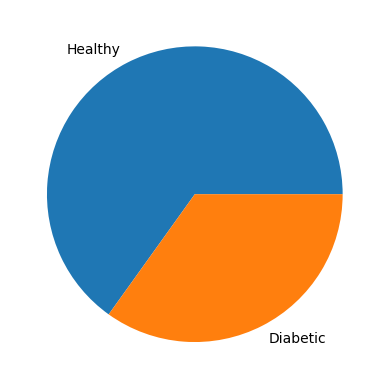

In [14]:
plt.pie(df["Outcome"].value_counts(), labels=["Healthy" , "Diabetic"])

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

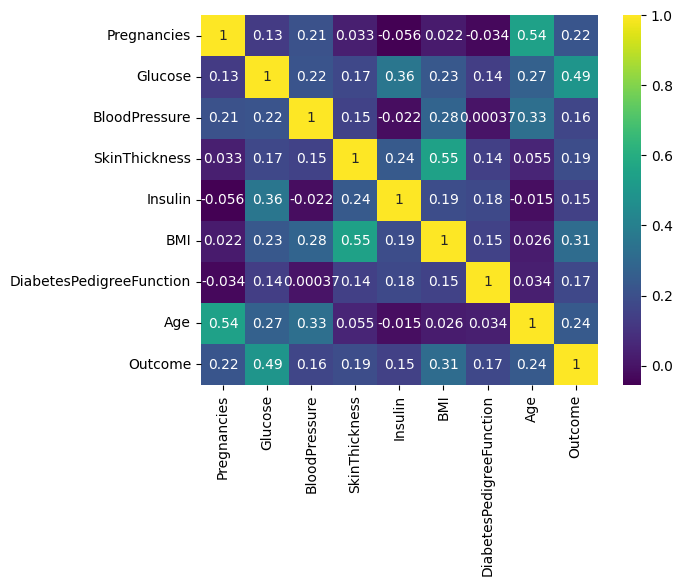

In [16]:
sns.heatmap(df.corr(), annot = True, cmap = "viridis") #annot = True to print the values inside the square

In [17]:
#Dividing the dataset into independent & dependent variables
#x = independent 
#y = dependent / target

x = df.iloc[:,0:8] 
y = df.iloc[:,-1]

In [18]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


In [19]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [20]:
#Feature Scaling the dependent variables
sc = StandardScaler()
x = sc.fit_transform(x)

In [21]:
x

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [22]:
#Splitting the data into train & test
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20, random_state = 0)

In [23]:
x_train.shape # type: ignore

(614, 8)

In [24]:
x_test.shape # type: ignore

(154, 8)

In [25]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
def get_scores(model , x_train , x_test , y_train , y_test):
    model.fit(x_train , y_train)
    return model.score(x_test , y_test)

scores_l = []
scores_dt = []
scores_rf = []
scores_svc = []
scores_knn = []
    
for train_index , test_index in folds.split(x , y):
    x_train1 , x_test1 , y_train1 , y_test1 = x[train_index], x[test_index],y[train_index], y[test_index]
    scores_l.append(get_scores(LogisticRegression(),x_train1 , x_test1 , y_train1 , y_test1))
    scores_dt.append(get_scores(DecisionTreeClassifier(),x_train1 , x_test1 , y_train1 , y_test1))
    scores_rf.append(get_scores(RandomForestClassifier(),x_train1 , x_test1 , y_train1 , y_test1))
    scores_svc.append(get_scores(SVC(),x_train1 , x_test1 , y_train1 , y_test1))
    scores_knn.append(get_scores(KNeighborsClassifier(),x_train1 , x_test1 , y_train1 , y_test1))
    


In [26]:
print(scores_l,
scores_dt,
scores_rf ,
scores_svc,
scores_knn)

print(f"Logistic : {np.average(scores_l)}")
print(f"DT : {np.average(scores_dt)}")
print(f"RF : {np.average(scores_rf)}")
print(f"SVC : {np.average(scores_svc)}")
print(f"knn : {np.average(scores_knn)}")

[0.7272727272727273, 0.7792207792207793, 0.7922077922077922, 0.7012987012987013, 0.7792207792207793, 0.7662337662337663, 0.7922077922077922, 0.7922077922077922, 0.7236842105263158, 0.8289473684210527] [0.6363636363636364, 0.7272727272727273, 0.6493506493506493, 0.6233766233766234, 0.6363636363636364, 0.6753246753246753, 0.8051948051948052, 0.6883116883116883, 0.618421052631579, 0.7236842105263158] [0.7142857142857143, 0.8441558441558441, 0.7662337662337663, 0.7012987012987013, 0.7272727272727273, 0.7922077922077922, 0.8181818181818182, 0.8311688311688312, 0.6578947368421053, 0.7763157894736842] [0.7272727272727273, 0.8051948051948052, 0.7532467532467533, 0.7012987012987013, 0.7532467532467533, 0.7402597402597403, 0.8051948051948052, 0.8051948051948052, 0.7105263157894737, 0.8421052631578947] [0.7142857142857143, 0.7662337662337663, 0.7792207792207793, 0.6623376623376623, 0.6753246753246753, 0.7272727272727273, 0.7402597402597403, 0.7922077922077922, 0.6842105263157895, 0.80263157894736

In [27]:
model_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]

for  model in model_list:
    m = model.fit(x_train , y_train)
    pred = model.predict(x_test)
    print(accuracy_score(y_test , pred))


0.8181818181818182
0.7662337662337663
0.7922077922077922
0.7792207792207793
0.7792207792207793


In [28]:
# model_params = {
#     'svm': {
#         'model' : SVC(gamma='auto'),
#         'params' : {
#             'C' : [1,10,15,20],
#             'kernel' : ['linear' , 'rbf']
#         }
#     },
#     'random_forest' : {
#         'model' : RandomForestClassifier(),
#         'params' : {
#             'n_estimators' : [1,5,10]
#         }
#     },
#     'logistic_regression' : {
#         'model' : LogisticRegression(solver = 'liblinear' , multi_class = 'auto'),
#         'params' : {
#             'C' : [1,5,10]
#         }
#     }

# }

In [29]:
# scores = []
# for model_name , mp in model_params.items():
#     clf = GridSearchCV(mp["model"],mp["params"], cv = 5)
#     clf.fit(x_train , y_train)
#     scores.append({
#         'model' : model_name,
#         'best_score' : clf.best_score_,
#         'best_params' : clf.best_params_
#     })

In [30]:
# grid = pd.DataFrame(scores)
# grid

In [31]:
# grid = GridSearchCV(SVC(), param_grid= param_grid , cv=5)
# grid.fit(x_train,y_train)


In [32]:
#Training the model
clf = LogisticRegression()
clf.fit(x_train , y_train)


LogisticRegression()

In [33]:
y_pred = clf.predict(x_test)

Confusion Matrix: 
 [[98 19]
 [ 9 28]]
Accuracy Score: 0.8181818181818182
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       117
           1       0.60      0.76      0.67        37

    accuracy                           0.82       154
   macro avg       0.76      0.80      0.77       154
weighted avg       0.84      0.82      0.82       154



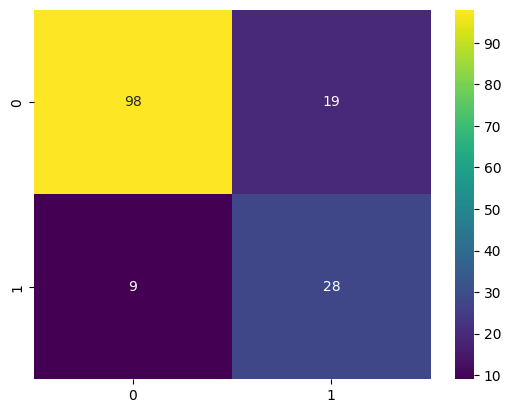

In [34]:
print(f"Confusion Matrix: \n {confusion_matrix(y_pred , y_test)}")
sns.heatmap(confusion_matrix(y_pred , y_test), annot = True , cmap = "viridis")
#cmap = "viridis" to change the color of the heatmap

print(f"Accuracy Score: {accuracy_score(y_pred , y_test)}")
print(f"Classification Report: \n {classification_report(y_pred , y_test)}")

In [35]:
#pickling our model to make api
import pickle

file = open("svc.pkl" , "wb")
pickle.dump(clf , file)
file.close()

In [36]:
test = np.array([[1	,126.0,	60.0,	23	,30.5,	30.1	,0.349,	47]])
# test = test.reshape(1,-1)
print(test)
print(clf.predict(test))

[[  1.    126.     60.     23.     30.5    30.1     0.349  47.   ]]
[1]


In [37]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106.0,76.0,23,30.5,37.5,0.197,26,0
759,6,190.0,92.0,23,30.5,35.5,0.278,66,1
760,2,88.0,58.0,26,16.0,28.4,0.766,22,0
761,9,170.0,74.0,31,30.5,44.0,0.403,43,1
762,9,89.0,62.0,23,30.5,22.5,0.142,33,0
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1
767,1,93.0,70.0,31,30.5,30.4,0.315,23,0


In [38]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.6,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.6,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.3,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.6,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.0,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.3,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,23,30.5,32.0,0.232,54,1


In [39]:
with open("svc.pkl" , "rb") as f:
    mp = pickle.load(f)

In [47]:
test2 = pd.DataFrame([0,137,40,35,168,43.1,2.228,33])
print(test2)
print((sc.fit_transform(test2)))
print(mp.predict(sc.fit_transform(test2).reshape(1, -1)))

test2 = np.array([0,137,40,35,168,43.1,2.228,33]).reshape(1, -1)
print(mp.predict(test2))


         0
0    0.000
1  137.000
2   40.000
3   35.000
4  168.000
5   43.100
6    2.228
7   33.000
[[-0.9952088 ]
 [ 1.38463456]
 [-0.30036403]
 [-0.38721962]
 [ 1.92313926]
 [-0.24651356]
 [-0.95650595]
 [-0.42196186]]
[0]
[1]
